In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA


In [16]:
data = 'Dataset\Pumpkin_Seeds_Dataset.csv'
df = pd.read_csv(data)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17704\2288125169.py:1: SyntaxWarning: invalid escape sequence '\P'
  data = 'Dataset\Pumpkin_Seeds_Dataset.csv'


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,cercevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,cercevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,cercevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,cercevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,cercevelik


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [18]:
from sklearn.model_selection import train_test_split
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [21]:
# Prediksi menggunakan data uji
y_pred = svm_model.predict(X_test_scaled)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Menampilkan classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Akurasi: 0.856
Confusion Matrix:
 [[202  47]
 [ 25 226]]
Classification Report:
                precision    recall  f1-score   support

Urgup Sivrisi       0.89      0.81      0.85       249
   cercevelik       0.83      0.90      0.86       251

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500



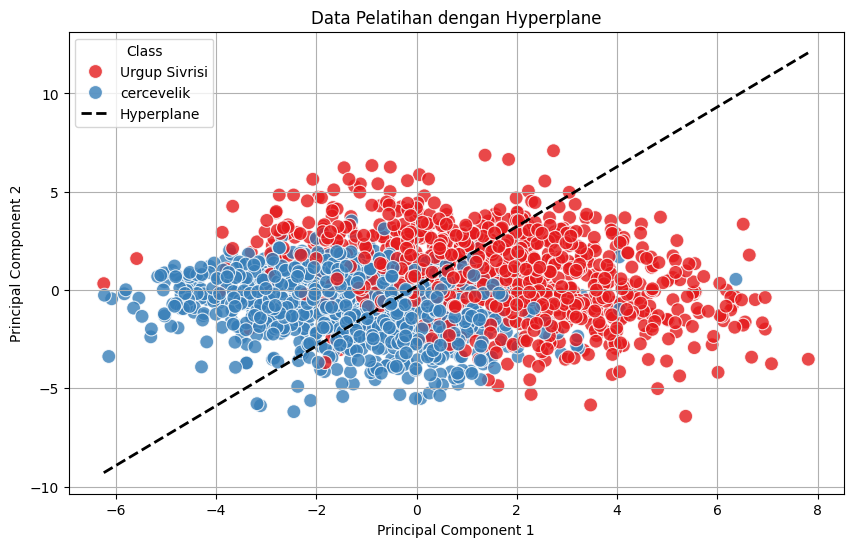

In [22]:
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Mendapatkan bobot dan bias dari model SVM
weights = svm_model.coef_[0]
bias = svm_model.intercept_[0]

# Plotting data pelatihan
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train, palette='Set1', s=100, alpha=0.8)

# Plotting hyperplane
x_hyperplane = np.linspace(X_train_pca[:,0].min(), X_train_pca[:,0].max(), 10)
y_hyperplane = (-weights[0] / weights[1]) * x_hyperplane - bias / weights[1]
plt.plot(x_hyperplane, y_hyperplane, color='black', linestyle='--', linewidth=2, label='Hyperplane')

plt.title('Data Pelatihan dengan Hyperplane')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.grid(True)
plt.show()


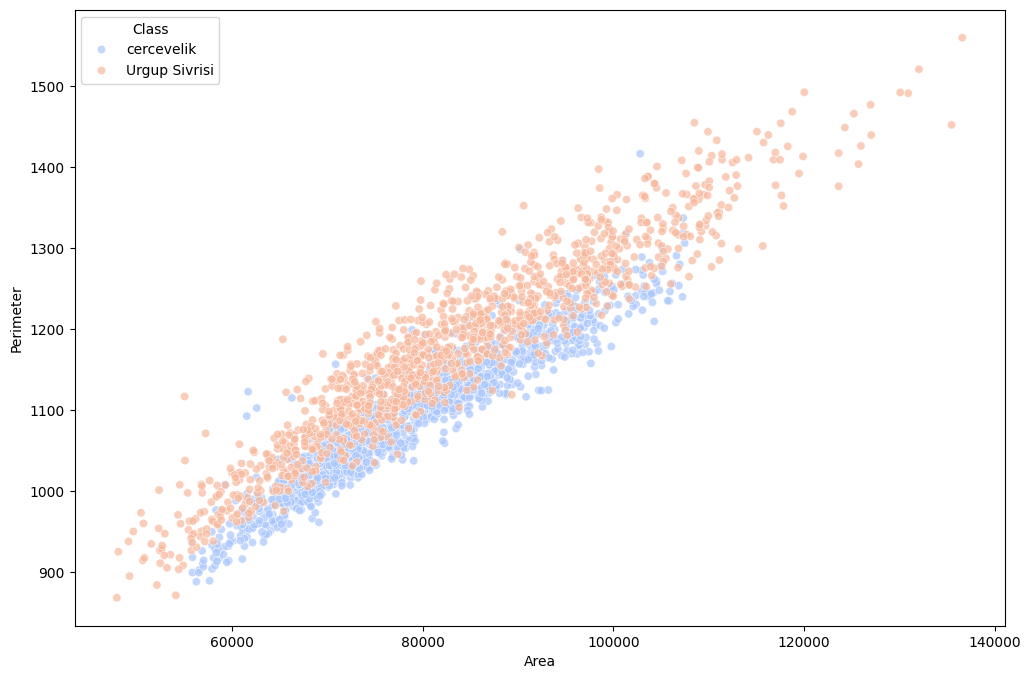

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="Area", y="Perimeter", hue="Class", alpha=0.7, palette='coolwarm')

df = pd.get_dummies(df,drop_first=True)

Akurasi: 0.856
Confusion Matrix:
 [[202  47]
 [ 25 226]]
Classification Report:
                precision    recall  f1-score   support

Urgup Sivrisi       0.89      0.81      0.85       249
   cercevelik       0.83      0.90      0.86       251

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500



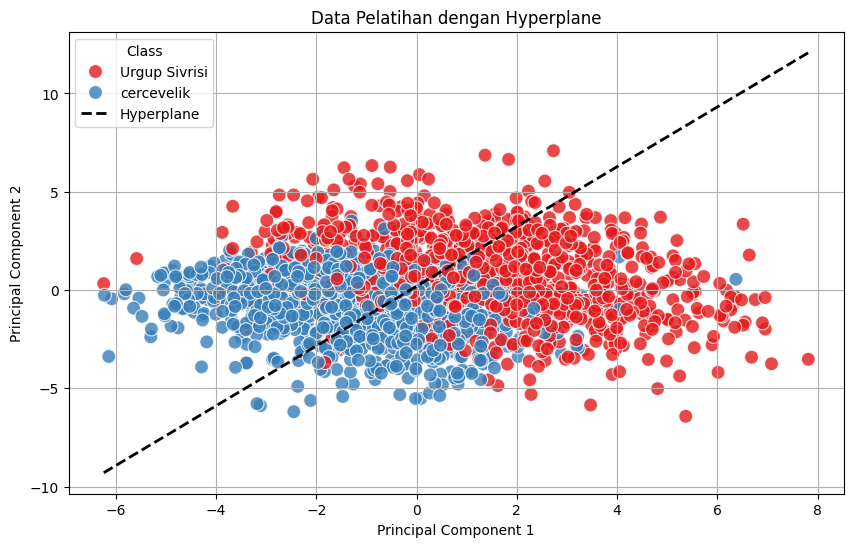

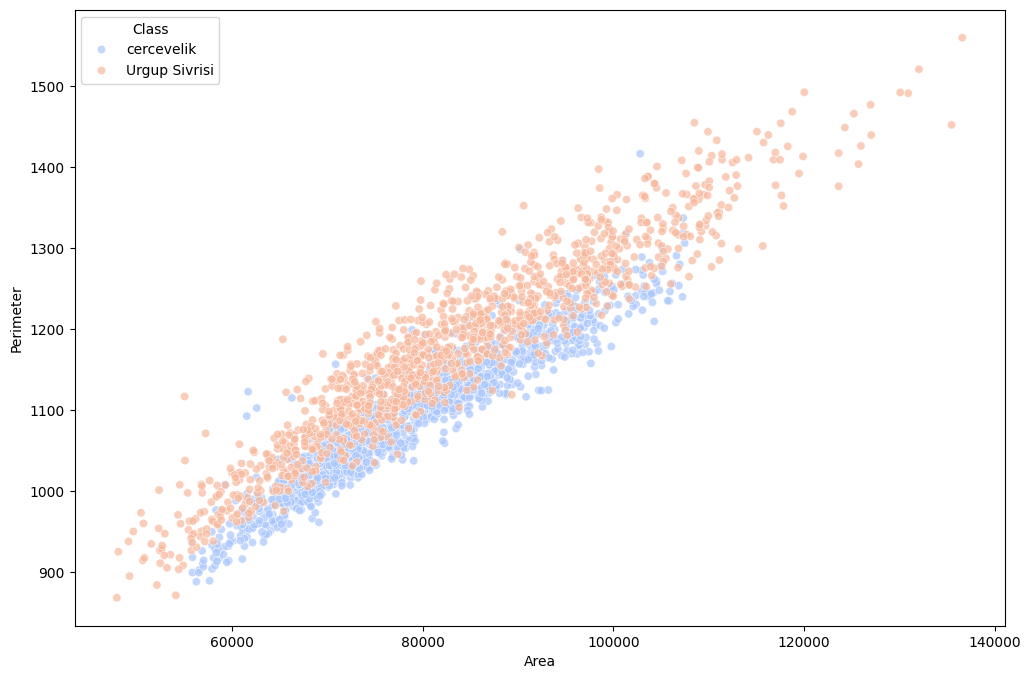

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Membaca dataset
data = 'Dataset/Pumpkin_Seeds_Dataset.csv'
df = pd.read_csv(data)

# Mempersiapkan fitur dan label
X = df.drop('Class', axis=1)
y = df['Class']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melatih model SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Prediksi menggunakan data uji
y_pred = svm_model.predict(X_test_scaled)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Menampilkan classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Mendapatkan bobot dan bias dari model SVM
weights = svm_model.coef_[0]
bias = svm_model.intercept_[0]

# Plotting data pelatihan dan hyperplane
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train, palette='Set1', s=100, alpha=0.8)

# Plotting hyperplane
x_hyperplane = np.linspace(X_train_pca[:,0].min(), X_train_pca[:,0].max(), 10)
y_hyperplane = (-weights[0] / weights[1]) * x_hyperplane - bias / weights[1]
plt.plot(x_hyperplane, y_hyperplane, color='black', linestyle='--', linewidth=2, label='Hyperplane')

plt.title('Data Pelatihan dengan Hyperplane')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.grid(True)
plt.show()

# Visualisasi data asli
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="Area", y="Perimeter", hue="Class", alpha=0.7, palette='coolwarm')
plt.show()
